# Notebook simple para comprobar el funcionamiento de GitHub

Este notebook es una excusa para probar el funcionamiento de los comando de GitHub.

### Librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Lectura de datos + Informe simple

In [ ]:
# Ruta al archivo
ruta = r"C:\Users\andre\Proyectos\facies_well\FC_AC_collab\Data\Processed_Wells.csv"

# Carga correcta del archivo CSV
df = pd.read_csv(ruta)

# Vista previa
print("Columnas del DataFrame:", df.columns.tolist())
df.head()

Columnas del DataFrame: ['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS']


,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [ ]:
# Info general
print("🔍 Información general:")
print(df.info())

# Columnas categóricas y clases únicas
columnas_categoricas = ['Facies', 'Formation', 'Well Name', 'NM_M']
print("\n🔠 Valores únicos por columna categórica:")
for col in columnas_categoricas:
    clases = df[col].unique()
    print(f"- {col} ({len(clases)} clases): {clases}")

# Estadísticas numéricas
print("\n📈 Descripción estadística:")
print(df.describe())

🔍 Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4069 entries, 0 to 4068
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     4069 non-null   int64  
 1   Formation  4069 non-null   object 
 2   Well Name  4069 non-null   object 
 3   Depth      4069 non-null   float64
 4   GR         4069 non-null   float64
 5   ILD_log10  4069 non-null   float64
 6   DeltaPHI   4069 non-null   float64
 7   PHIND      4069 non-null   float64
 8   PE         4069 non-null   float64
 9   NM_M       4069 non-null   int64  
 10  RELPOS     4069 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 349.8+ KB
None

🔠 Valores únicos por columna categórica:
- Facies (9 clases): [3 2 8 6 7 4 5 9 1]
- Formation (14 clases): ['A1 SH' 'A1 LM' 'B1 SH' 'B1 LM' 'B2 SH' 'B2 LM' 'B3 SH' 'B3 LM' 'B4 SH'
 'B4 LM' 'B5 SH' 'B5 LM' 'C SH' 'C LM']
- Well Name (9 clases): ['SHRIMPLIN' 'ALEXANDER D' 'SHANKLE'

### Creación de sub-datasets por pozo

In [17]:
# Crear subdatasets por pozo
pozos = df['Well Name'].unique()

# Diccionario con un DataFrame por pozo
subdatasets = {pozo: df[df['Well Name'] == pozo].copy() for pozo in pozos}

# Mostrar los nombres de los pozos y cantidad de registros por pozo
for pozo, subdf in subdatasets.items():
    print(f"🛢️ Pozo: {pozo} — {len(subdf)} registros")


🛢️ Pozo: SHRIMPLIN — 471 registros
🛢️ Pozo: ALEXANDER D — 466 registros
🛢️ Pozo: SHANKLE — 449 registros
🛢️ Pozo: LUKE G U — 461 registros
🛢️ Pozo: KIMZEY A — 439 registros
🛢️ Pozo: CROSS H CATTLE — 501 registros
🛢️ Pozo: NOLAN — 415 registros
🛢️ Pozo: NEWBY — 463 registros
🛢️ Pozo: CHURCHMAN BIBLE — 404 registros


### Graficos de los diferentes perfiles para uno de los pozos

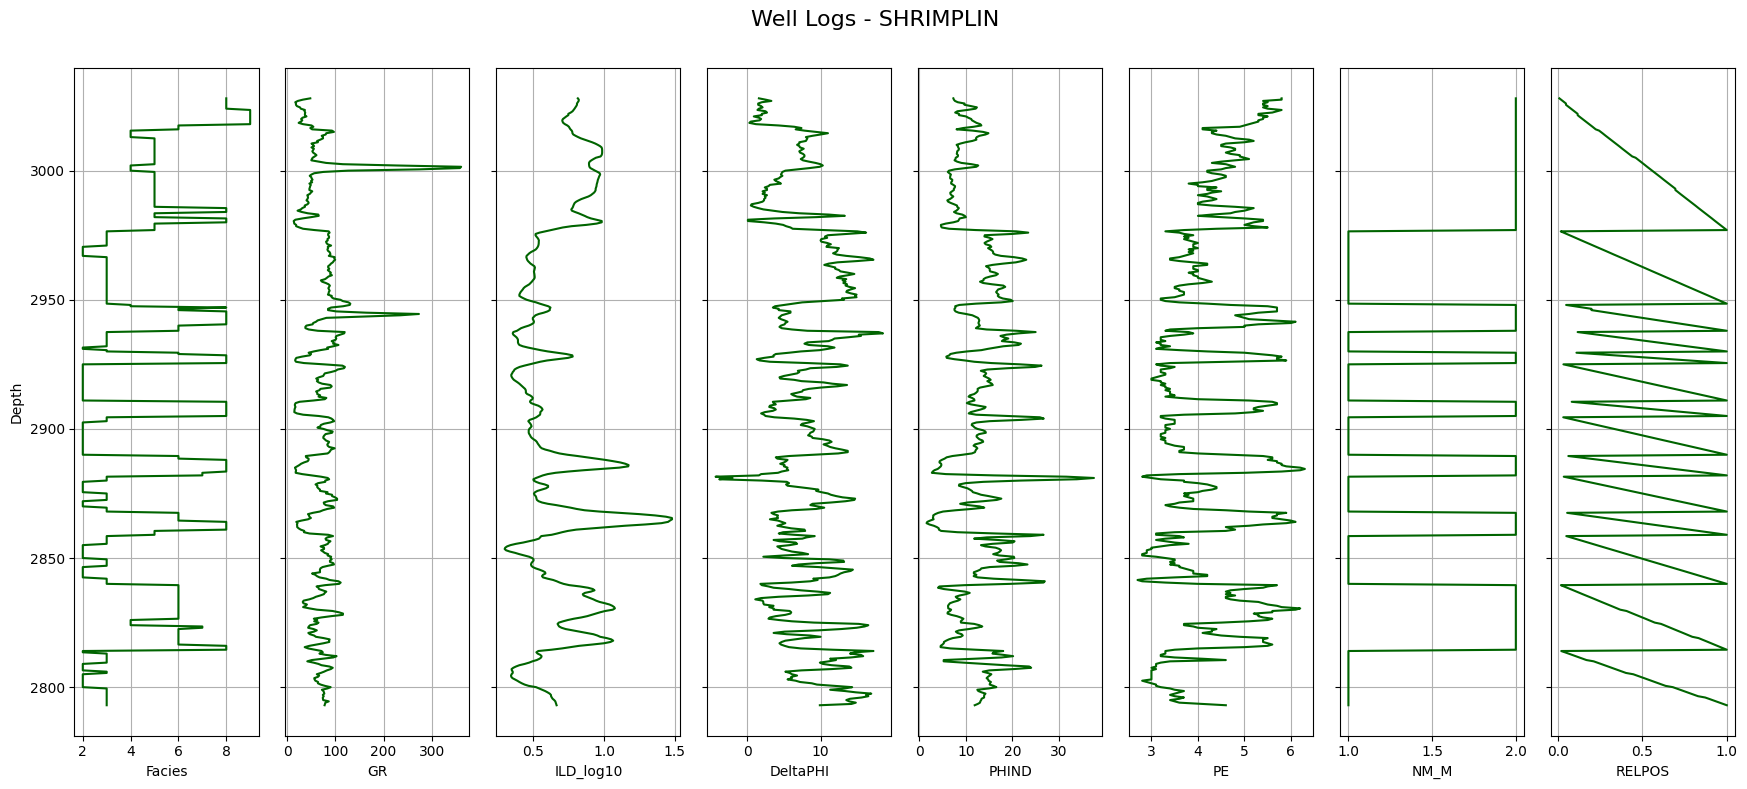

In [ ]:
# Datos del pozo
pozo_df = subdatasets["SHRIMPLIN"]

# Variables numéricas (exceptuando Depth)
columnas_numericas = [col for col in pozo_df.select_dtypes(include='number').columns if col != "Depth"]

# Crear subplots verticales
n = len(columnas_numericas)
fig, axs = plt.subplots(1, n, figsize=(2.2*n, 8), sharey=True)  # ancho por cantidad, alto fijo
fig.suptitle("Well Logs - SHRIMPLIN", fontsize=16)
plt.subplots_adjust(wspace=0.3)  # separación entre subplots

# Graficar cada curva
for i, col in enumerate(columnas_numericas):
    axs[i].plot(pozo_df[col], pozo_df["Depth"], color='darkgreen')
    axs[i].invert_yaxis()
    axs[i].set_xlabel(col)
    if i == 0:
        axs[i].set_ylabel("Depth")
    axs[i].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # espacio para el título
plt.show()
